<center>

# Python for Quantum Mechanics: 
# Week 4 Tutorial

</center>

In [1]:
import numpy as np

<center>

## Exercise 1: Multiplying Matrices

</center>

Create and multiply the following arrays using Numpy.

$ \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\ 0&1 & 0 & 0 & 0 & 0 \\
0&0 & 0 & 1 & 0 & 0 \\ 0&0 & 1 & 0 & 0 & 0 \\
0&0 & 0 & 0 & 1 & 0 \\ 0&0 & 0 & 0 & 0 & 1
\end{bmatrix} \times \begin{bmatrix}
1 \\ 0 \\ 1 \\ 0 \\ 1 \\ 0
\end{bmatrix} = \begin{bmatrix}
? \\ ? \\?\\?\\?\\?
\end{bmatrix}$

In [124]:
arr1 = np.eye(6, dtype=int)
arr1[2,3], arr1[3,2] = 1 , 1
arr1[2,2], arr1[3,3] = 0 , 0

arr2 = np.array([[1],[0],[1],[0],[1],[0]], dtype=int)

result = np.matmul(arr1,arr2)
result = arr1@arr2
arr1 = np.matrix(arr1)
arr2 = np.matrix(arr2)
print(result)

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]]


<center>

## Exercise 2: Slicing Arrays

</center>

Take the arrays from exercise 1 and slice them to then execute the following expression

$ \begin{bmatrix}
0 & 1 \\ 1&0
\end{bmatrix} \times \begin{bmatrix}
1 \\ 0
\end{bmatrix} = \begin{bmatrix}
? \\ ?
\end{bmatrix}$

In [3]:
arr1 = arr1[2:4,2:4]
arr2 = arr2[2:4]

result = np.matmul(arr1,arr2)
print(result)

[[0]
 [1]]


<center>

## Exercise 3: Diagonalise

</center>

Using the eigenvector matrix $E$ of a random $(6,6)$ matrix $A$, diagonalise it with the formula

$$ D = E^{-1}AE$$

In [4]:
import numpy.random as rnd

In [125]:
A = rnd.random((6,6))

eigval, E = np.linalg.eig(A) 

D = np.linalg.inv(E)@A@E

print(np.round(D,3))

[[ 3.086+0.j    -0.   -0.j    -0.   +0.j    -0.   -0.j    -0.   +0.j
  -0.   -0.j   ]
 [ 0.   +0.j    -0.567-0.j    -0.   +0.j    -0.   -0.j     0.   -0.j
   0.   +0.j   ]
 [ 0.   -0.j     0.   -0.j     0.167+0.652j  0.   +0.j    -0.   -0.j
   0.   -0.j   ]
 [-0.   +0.j     0.   +0.j     0.   -0.j     0.167-0.652j  0.   +0.j
  -0.   +0.j   ]
 [ 0.   -0.j    -0.   +0.j     0.   +0.j     0.   +0.j     0.169+0.345j
   0.   -0.j   ]
 [ 0.   +0.j    -0.   -0.j     0.   -0.j     0.   +0.j     0.   +0.j
   0.169-0.345j]]


<center>

## Exercise 4: Normal Distribution

</center>

Create an array of size $10,000$ with a normal distribution with mean $100$ and standard deviation of $10$.

In [6]:
mu, sig, size = 100,10,10000

norm_arr = rnd.normal(mu,sig,size)

print(norm_arr,'\n')

print(np.mean(norm_arr))
print(np.std(norm_arr))
print(np.var(norm_arr))

[ 96.6128931  104.77033039 107.55349219 ...  99.03084318 120.49081838
 112.39837483] 

99.98476310406281
10.07591669829654
101.52409731101106


Now create a random array, of integers between $0\rightarrow10,000$, of size $1,000$.

In [133]:
rarr = rnd.randint(0,10000,1000)

rarr = 10000*rnd.random(1000)
rarr = np.round(rarr,0).astype(int)

rarr = rnd.choice(np.arange(10000),1000,replace=False)
print(rarr)

[1 3 0 5 7]


Using this random array, pull a random sample from that of the normal distribution.

In [8]:
random_sample = norm_arr[rarr]

Analyse this random_sample, find it's mean, std and variance.

In [9]:
print(np.mean(random_sample))
print(np.std(random_sample))
print(np.var(random_sample))

99.11402445135091
10.218333010183482
104.4143295070054


<center>

## Exercise 5: Linear Regression & Stochastic Gradient Descent

</center>

Use stochastic gradient descent to minimise the cost function for a linear least-square fit. Return the slope and y-intercept of the resulting line. Fit the following scattered data points (x,y).

In [10]:
import numpy.random as rnd

In [11]:
m = 3
c = 2

x = np.arange(0,11,0.1)
y = m*x + c + 0.1*rnd.random(len(x))*((-1)**np.round((rnd.random(len(x)))))

In [12]:
sample_size = int(len(x)/10)

rarr = np.sort(rnd.randint(0,len(x),sample_size))

x = x[rarr]
y = y[rarr]

print(x)
print(y)

[ 13  26  27  30  35  40  52  58  63  76 100]
[ 1.3  2.6  2.7  3.   3.5  4.   5.2  5.8  6.3  7.6 10. ]
[ 5.92708907  9.88255564 10.00279101 10.95192138 12.53012522 13.95204165
 17.63569823 19.45711895 20.90965132 24.81416831 32.00596335]


In [13]:
def cost(x,y,m,c):
    return 1/(len(x))*sum(i**2 for i in (y-(m*x + c)))

def m_gradient(x,y,m,c):
    return -2/len(x)*sum(i for i in (x*(y-(m*x + c))))

def c_gradient(x,y,m,c):
    return -2/len(x)*sum(i for i in (y-(m*x + c)))

In [19]:
def gradient_descent(x, y, guess, learning_rate, n):
    result = guess
    for _ in range(n):
        result[0],result[1] = result[0]-learning_rate*m_gradient(x,y,result[0],result[1]), result[1]-learning_rate*c_gradient(x,y,result[0],result[1]) 
    return result

In [20]:
guess = np.array([1.0,1.0])
learning_rate = 0.01
n = 10000

print(gradient_descent(x,y,guess,learning_rate,n))

[3.00268037 1.99361316]


<center>

## Exercise 6: Random Pi
    
</center>

Using `rnd.random()`, calculate $\pi$.

In [164]:
n = 1000000
print(4*sum(rnd.random(n)**2 + rnd.random(n)**2 < 1)/n)

3.140908


<center>

## Exercise 7: Random Walk
    
</center>

Write a compact algorithm using numpy array functionality to generate a random walk. Find the root-mean-squared distance against the steps taken.

In [43]:
import matplotlib.pyplot as plt

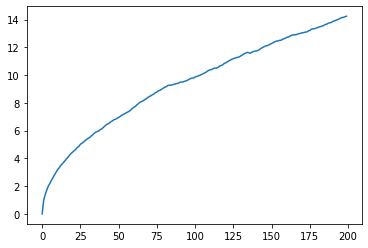

In [47]:
steps = 200
walks = 2000

y = np.zeros(steps)

Square_Sum = np.zeros(steps)

for j in range(walks):
    for i in range(1,steps):
        y[i] = y[i-1] + rnd.choice([-1,1])
        Square_Sum[i] += (y[i])**2

RMS = np.sqrt(Square_Sum/walks)

plt.plot(np.arange(steps), RMS)
plt.show()

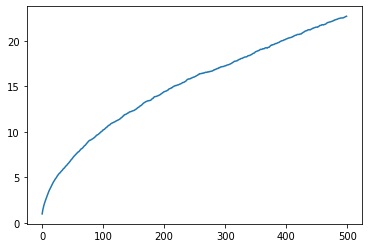

In [163]:
steps = 500
walks = 2000



y = np.cumsum(np.array([rnd.choice([-1,1],steps) for _ in range(walks)]),axis=1)

Square_Sum = np.sqrt(sum(y**2)/walks)

plt.plot(np.arange(steps),Square_Sum)
plt.show() 

In [58]:
steps = 500
walks = 2000


y = np.cumsum(np.array(rnd.choice([-1,1],(walks,steps))),axis=1)

Square_Sum = np.sqrt(sum(y**2)/walks)

plt.plot(np.arange(steps), Square_Sum)
plt.show()

<center>

## Exercise 8: Quantum Random Walk
    
</center>

In [59]:
from scipy.linalg import expm

def adj_cycle(n):
    A = np.zeros((n,n))
    for x in range(n):
        A[x, (x+1)%n] = 1
        A[(x+1)%n, x] = 1
        
    return A

In [63]:
n = 200
t = 40

H = adj_cycle(n)
U = expm(-1j*H*t)

initial = np.zeros((n,1))
initial[n//2] = 1

initial = np.abs(U@initial)**2

plt.plot(initial)
plt.show()